In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from scipy import stats

sns.set_theme()

print("Seaborn: {}".format(sns.__version__))
print("NumPy: {}".format(np.__version__))

Seaborn: 0.11.0
NumPy: 1.17.4


In [3]:
# Usable list

info = ["SEX","EDUCATION","MARRIAGE","AGE"]
delay_n = ["PAY_APR", "PAY_MAY", "PAY_JUN", "PAY_JUL", "PAY_AUG", "PAY_SEP"]
bill_n = ["BILL_AMT_APR", "BILL_AMT_MAY", "BILL_AMT_JUN", "BILL_AMT_JUL", "BILL_AMT_AUG", "BILL_AMT_SEP"]
pay_n = ["PAY_AMT_APR", "PAY_AMT_MAY", "PAY_AMT_JUN", "PAY_AMT_JUL", "PAY_AMT_AUG", "PAY_AMT_SEP"]

In [4]:
train = pd.read_csv("C:/Users/chowonjae/Desktop/내부 프로젝트/uci_creditcard-train-0.0-0.0 (1).csv")
test = pd.read_csv("C:/Users/chowonjae/Desktop/내부 프로젝트/uci_creditcard-test-0.0-0.0 (1).csv")

length = len(train)

rename_dict =  {"default payment next month":"default", 
                                "PAY_6" : "PAY_APR", 
                                "PAY_5" : "PAY_MAY", 
                                "PAY_4" : "PAY_JUN",  
                                "PAY_3" : "PAY_JUL",
                                "PAY_2": "PAY_AUG", 
                                "PAY_0": "PAY_SEP", 
                                "PAY_AMT6": "PAY_AMT_APR", 
                                "PAY_AMT5": "PAY_AMT_MAY", 
                                "PAY_AMT4": "PAY_AMT_JUN",
                                "PAY_AMT3": "PAY_AMT_JUL", 
                                "PAY_AMT2": "PAY_AMT_AUG", 
                                "PAY_AMT1": "PAY_AMT_SEP", 
                                "BILL_AMT6": "BILL_AMT_APR", 
                                "BILL_AMT5": "BILL_AMT_MAY", 
                                "BILL_AMT4": "BILL_AMT_JUN", 
                                "BILL_AMT3": "BILL_AMT_JUL", 
                                "BILL_AMT2": "BILL_AMT_AUG",
                                "BILL_AMT1": "BILL_AMT_SEP"}

#Change the column name "default payment next month" -> "default"
train = train.rename(columns = rename_dict)
test = test.rename(columns = rename_dict)

train = train.drop(["ID","sep_idx"], axis = 1)
train_drop_info = train.drop(info, axis = 1)

test = test.drop(["ID","sep_idx"], axis = 1)

# Change Type

train["SEX"] = train["SEX"].astype(np.int)
train["EDUCATION"] = train["EDUCATION"].astype(np.int)
train["MARRIAGE"] = train["MARRIAGE"].astype(np.int)
train["AGE"] = train["AGE"].astype(np.int)
train["default"] = train["default"].astype(np.int)
train[delay_n] = train[delay_n].astype(np.int)

test["SEX"] = test["SEX"].astype(np.int)
test["EDUCATION"] = test["EDUCATION"].astype(np.int)
test["MARRIAGE"] = test["MARRIAGE"].astype(np.int)
test["AGE"] = test["AGE"].astype(np.int)
test["default"] = test["default"].astype(np.int)
test[delay_n] = test[delay_n].astype(np.int)

In [5]:
X_train = train.drop("default", axis = 1)
y_train = train["default"]

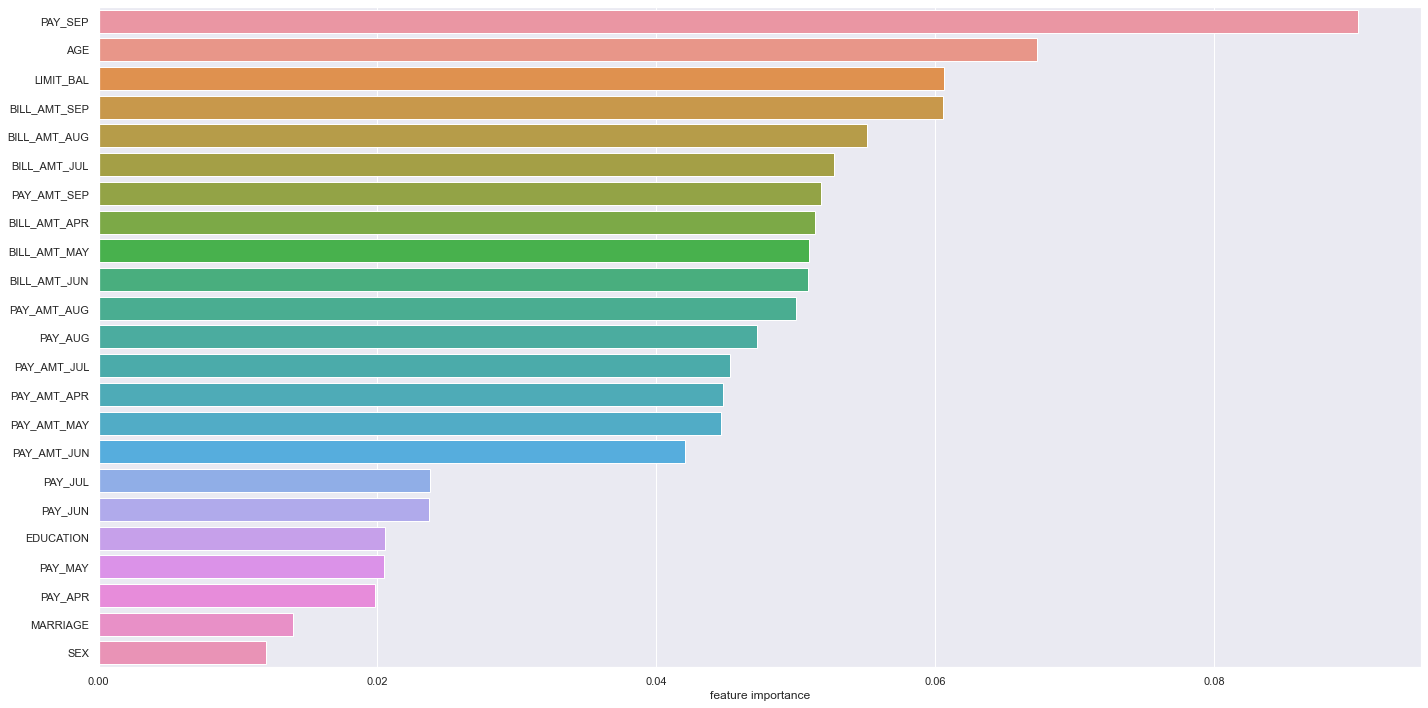

In [26]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

fig, ax = plt.subplots(1,1, figsize = (20,10))

fi = rf.feature_importances_
col = X_train.columns

fi_df = pd.DataFrame(fi, index = col, columns = ["feature importance"])
fi_df  = fi_df.sort_values(by = "feature importance", ascending = False)

sns.barplot(y = fi_df.index, x = "feature importance", data = fi_df,  ax = ax)

plt.tight_layout()
plt.show()

- PAY_SEP, AGE, LIMIT_BAL순으로 feature importance가 높은 것을 볼 수 있다.
- 이 변수를 기준으로 층을 나누어 분석.

## PAY_SEP

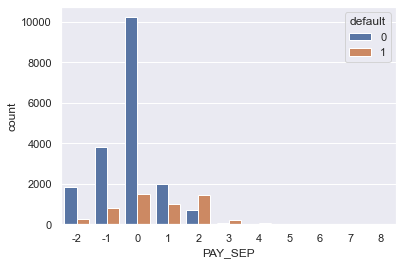

In [37]:
PAY_SEP_train = train[["PAY_SEP", "default"]]

sns.countplot(x = "PAY_SEP", data = PAY_SEP_train, hue = "default")
plt.show()

In [43]:
## default = 1

PAY_SEP_default_ratio = PAY_SEP_train.groupby("PAY_SEP").sum() / PAY_SEP_train.groupby("PAY_SEP").count()

In [53]:
PAY_SEP_default_ratio.style.background_gradient()

,default
PAY_SEP,
-2,0.130703
-1,0.175393
0,0.128454
1,0.339993
2,0.681691
3,0.772000
4,0.686567
5,0.600000
6,0.555556


- -2\~0까지는 대체로 default비율이 낮고 2~8까지는 매우 높다.
- -2, -1, 0, 1, 2\~8로 층을 나누어서 데이터 분석

In [73]:
train["PAY_SEP_0"] = 0
mask_0 = (train["PAY_SEP"] == -2) 
train.loc[mask_0, "PAY_SEP_0"] = 1

train["PAY_SEP_1"] = 0
mask_1 = train["PAY_SEP"] == -1
train.loc[mask_1, "PAY_SEP_1"] = 1

train["PAY_SEP_2"] = 0
mask_2 = train["PAY_SEP"] == 0
train.loc[mask_2, "PAY_SEP_2"] = 1

train["PAY_SEP_3"] = 0
mask_3 = train["PAY_SEP"] == 1
train.loc[mask_3, "PAY_SEP_3"] = 1

In [74]:
PAY_SEP_0 = train[train["PAY_SEP_0"] == 1]
PAY_SEP_0.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default,PAY_SEP_0,PAY_SEP_1,PAY_SEP_2,PAY_SEP_3
5,20000.0,1,3,2,35,-2,-2,-2,-2,-1,...,0.0,0.0,13007.0,1122.0,0.0,0,1,0,0,0
21,500000.0,2,2,1,54,-2,-2,-2,-2,-2,...,22827.0,7521.0,71439.0,981.0,51582.0,0,1,0,0,0
22,500000.0,1,1,1,58,-2,-2,-2,-2,-2,...,31178.0,3180.0,0.0,5293.0,768.0,0,1,0,0,0
29,210000.0,1,1,2,29,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0
35,500000.0,2,1,1,45,-2,-2,-2,-2,-2,...,162.0,0.0,151.0,2530.0,0.0,0,1,0,0,0


In [95]:
## data

apr = ["BILL_AMT_APR", "PAY_AMT_APR"]
may = ["BILL_AMT_MAY", "PAY_AMT_MAY"]
jun = ["BILL_AMT_JUN", "PAY_AMT_JUN"]
jul = ["BILL_AMT_JUL", "PAY_AMT_JUL"]
aug = ["BILL_AMT_AUG", "PAY_AMT_AUG"]
sep = ["BILL_AMT_SEP", "PAY_AMT_SEP"]
month_list = [apr, may, jun, jul, aug, sep]

def month_Correlation(X, y, data = train, month = 1, log_transformation = False, summary = False): 
    R_square_list = []
    if log_transformation:
        fig, ax = plt.subplots(2, round((6 - month + 1)/2), figsize = (12, 6))
        ax = ax.flatten()
        
        for i in range(6 - month):
            month_to_month = data[[X[i], y[i]]]
            log_month_to_month = np.log(month_to_month - np.min(month_to_month) + 1)

            X_data = log_month_to_month[X[i]].to_numpy().reshape(-1,1)
            y_data = log_month_to_month[y[i]].to_numpy()

            sns.scatterplot(x = X[i], y = y[i], data = log_month_to_month, ax = ax[i])
            ax[i].set_xlabel(X[i])
            ax[i].set_ylabel(y[i])

            lr = LinearRegression()
            lr.fit(X_data, y_data)

            lr_coef = lr.coef_
            lr_intercept = lr.intercept_
            lr_R_square = lr.score(X_data, y_data)
            R_square_list.append(lr_R_square)
            
            if summary:
                X2 = sm.add_constant(log_month_to_month[X[i]])
                est = sm.OLS(log_month_to_month[y[i]], X2)
                est2 = est.fit()
                print("log {} vs log {}".format(X[i], y[i]))
                print(est2.summary())
            
            ax[i].set_title("log {} vs log {} \n y = {:.3f} + {:.3f} * X".format(X[i], y[i], lr_intercept, lr_coef[0]))
            ax[i].plot(X_data, lr_intercept + lr_coef * X_data, color = 'k')
        
        
    else:
        fig, ax = plt.subplots(2, round((6 - month + 1)/2), figsize = (12, 6))
        ax = ax.flatten()
        
        for i in range(6 - month):
            month_to_month = data[[X[i], y[i]]]

            X_data = month_to_month[X[i]].to_numpy().reshape(-1,1)
            y_data = month_to_month[y[i]].to_numpy()

            sns.scatterplot(x = X[i], y = y[i], data = month_to_month, ax = ax[i])
            ax[i].set_xlabel(X[i])
            ax[i].set_ylabel(y[i])

            lr = LinearRegression()
            lr.fit(X_data, y_data)

            lr_coef = lr.coef_
            lr_intercept = lr.intercept_
            lr_R_square = lr.score(X_data, y_data)
            R_square_list.append(lr_R_square)
            
            if summary:
                X2 = sm.add_constant(month_to_month[X[i]])
                est = sm.OLS(month_to_month[y[i]], X2)
                est2 = est.fit()
                print("{} vs {}".format(X[i], y[i]))
                print(est2.summary())
            
            ax[i].set_title("{} vs {} \n y = {:.3f} + {:.3f} * X".format(X[i], y[i], lr_intercept, lr_coef[0]))
            ax[i].plot(X_data, lr_intercept + lr_coef * X_data, color = 'k')
        
    plt.tight_layout()
    plt.show()
    
    return R_square_list

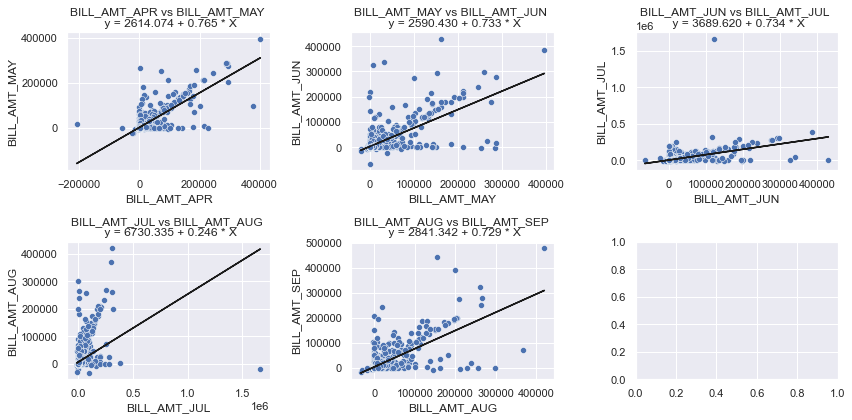

In [96]:
R_square_list = month_Correlation(X = bill_n[0:5], y = bill_n[1:6], data = PAY_SEP_0, month = 1, log_transformation = False, summary = False)

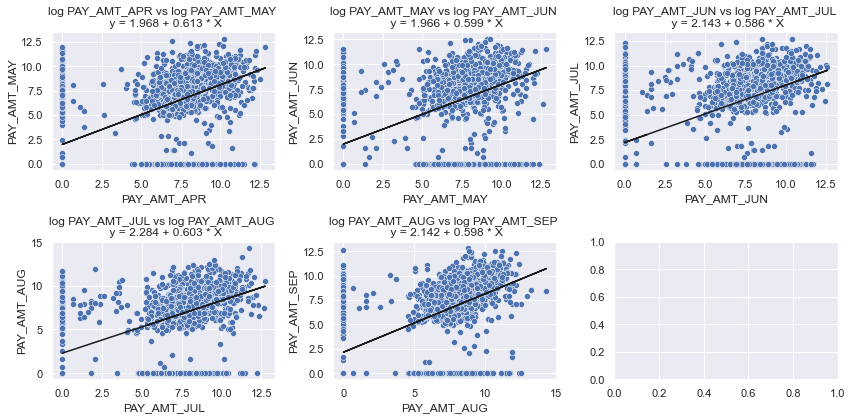

In [97]:
R_square_list = month_Correlation(X = pay_n[0:5], y = pay_n[1:6], data = PAY_SEP_0, month = 1, log_transformation = True, summary = False)

In [77]:
PAY_SEP_1 = train[train["PAY_SEP_1"] == 1]
PAY_SEP_1.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default,PAY_SEP_0,PAY_SEP_1,PAY_SEP_2,PAY_SEP_3
0,120000.0,2,2,2,26,-1,2,0,0,0,...,1000.0,1000.0,1000.0,0.0,2000.0,1,0,1,0,0
7,630000.0,2,2,2,41,-1,0,-1,-1,-1,...,6500.0,6500.0,6500.0,2870.0,0.0,0,0,1,0,0
17,50000.0,2,3,1,47,-1,-1,-1,-1,-1,...,3421.0,2044.0,30430.0,257.0,0.0,0,0,1,0,0
18,230000.0,2,1,2,27,-1,-1,-1,-1,-1,...,13281.0,15339.0,14307.0,37292.0,0.0,0,0,1,0,0
23,160000.0,1,1,2,30,-1,-1,-2,-2,-2,...,396.0,396.0,565.0,792.0,0.0,0,0,1,0,0


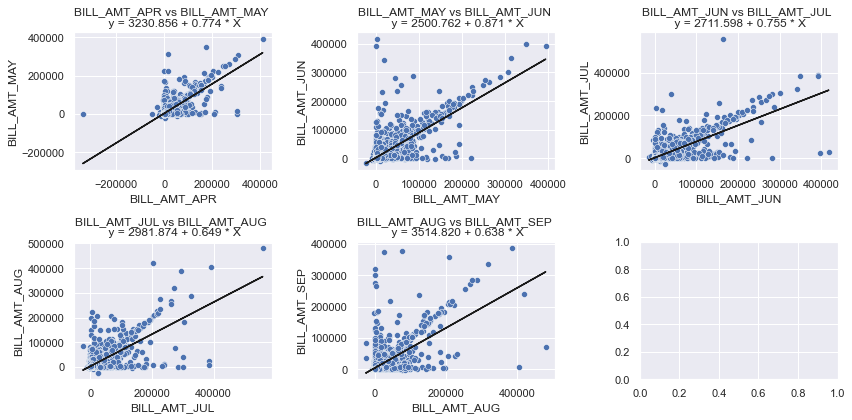

In [98]:
R_square_list = month_Correlation(X = bill_n[0:5], y = bill_n[1:6], data = PAY_SEP_1, month = 1, log_transformation = False, summary = False)

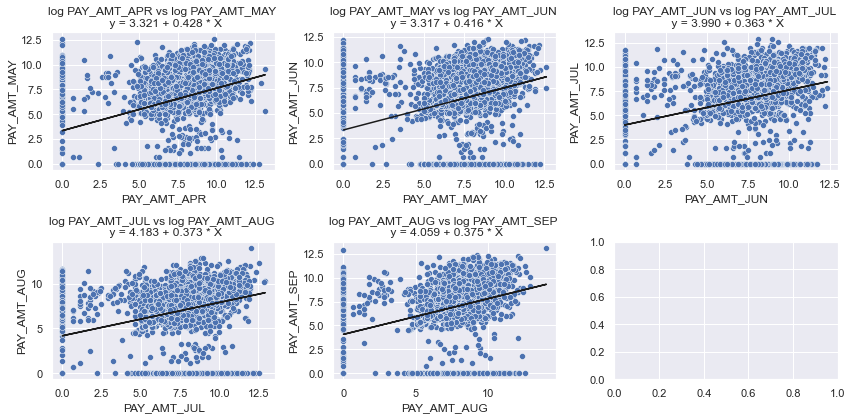

In [99]:
R_square_list = month_Correlation(X = pay_n[0:5], y = pay_n[1:6], data = PAY_SEP_1, month = 1, log_transformation = True, summary = False)

In [81]:
PAY_SEP_2 = train[train["PAY_SEP_2"] == 1]
PAY_SEP_2.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default,PAY_SEP_0,PAY_SEP_1,PAY_SEP_2,PAY_SEP_3
1,90000.0,2,2,2,34,0,0,0,0,0,...,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,0,1,0
2,50000.0,2,2,1,37,0,0,0,0,0,...,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,0,1,0
3,50000.0,1,1,2,37,0,0,0,0,0,...,1815.0,657.0,1000.0,1000.0,800.0,0,0,0,1,0
4,140000.0,2,3,1,28,0,0,2,0,0,...,0.0,432.0,1000.0,1000.0,1000.0,0,0,0,1,0
6,200000.0,2,3,2,34,0,0,2,0,0,...,12.0,50.0,300.0,3738.0,66.0,0,0,0,1,0


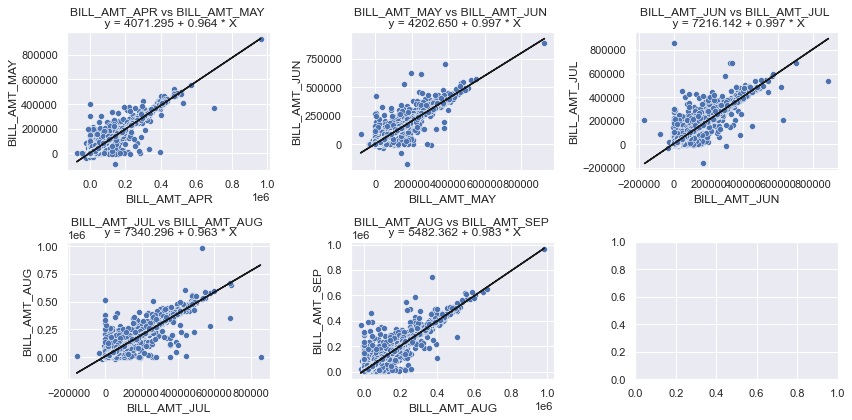

In [100]:
R_square_list = month_Correlation(X = bill_n[0:5], y = bill_n[1:6], data = PAY_SEP_2, month = 1, log_transformation = False, summary = False)

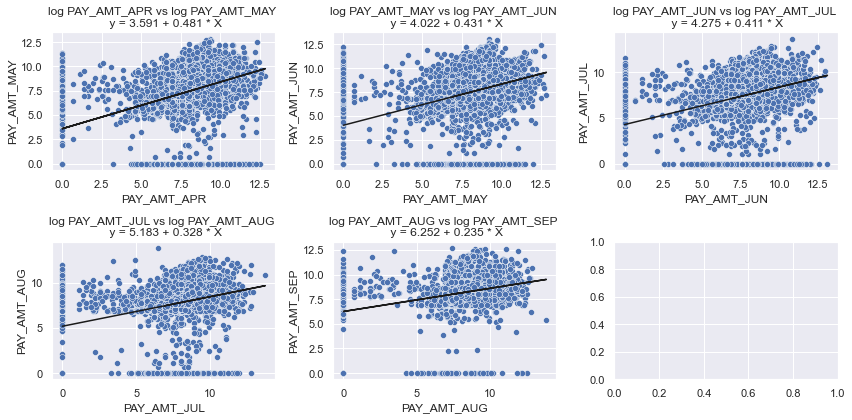

In [101]:
R_square_list = month_Correlation(X = pay_n[0:5], y = pay_n[1:6], data = PAY_SEP_2, month = 1, log_transformation = True, summary = False)

In [84]:
PAY_SEP_3 = train[train["PAY_SEP_3"] == 1]
PAY_SEP_3.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default,PAY_SEP_0,PAY_SEP_1,PAY_SEP_2,PAY_SEP_3
8,70000.0,1,2,2,30,1,2,2,0,0,...,0.0,3000.0,3000.0,1500.0,0.0,1,0,0,0,1
12,360000.0,2,1,1,49,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
13,180000.0,2,1,2,29,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
15,60000.0,1,1,2,27,1,-2,-1,-1,-1,...,1000.0,0.0,500.0,0.0,1000.0,1,0,0,0,1
32,70000.0,1,3,2,42,1,2,2,2,2,...,3100.0,2000.0,0.0,1500.0,1500.0,1,0,0,0,1


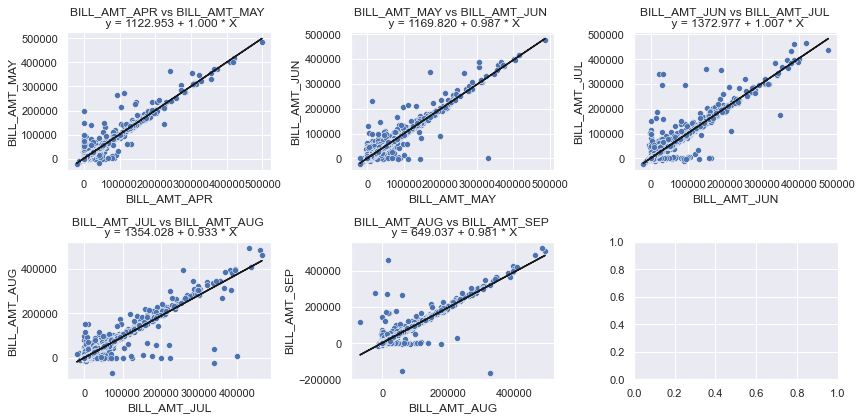

In [102]:
R_square_list = month_Correlation(X = bill_n[0:5], y = bill_n[1:6], data = PAY_SEP_3, month = 1, log_transformation = False, summary = False)

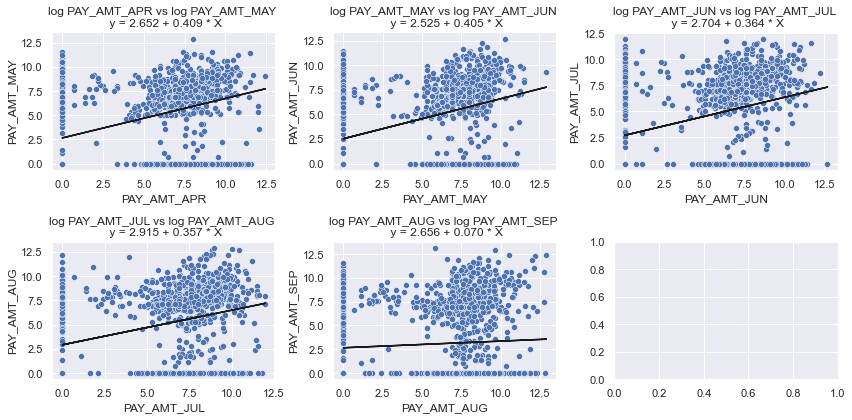

In [103]:
R_square_list = month_Correlation(X = pay_n[0:5], y = pay_n[1:6], data = PAY_SEP_3, month = 1, log_transformation = True, summary = False)

In [107]:
PAY_SEP_4 = train[(train["PAY_SEP_0"] == 0) & (train["PAY_SEP_1"] == 0) & (train["PAY_SEP_2"] == 0) & (train["PAY_SEP_3"] == 0)]
PAY_SEP_4.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default,PAY_SEP_0,PAY_SEP_1,PAY_SEP_2,PAY_SEP_3
19,50000.0,1,2,2,33,2,0,0,0,0,...,1500.0,1000.0,1000.0,1000.0,716.0,1,0,0,0,0
34,150000.0,2,1,2,29,2,0,0,0,0,...,1718.0,1049.0,1500.0,2000.0,5000.0,0,0,0,0,0
40,210000.0,2,1,2,30,2,-1,-1,-1,-1,...,1159.0,2280.0,300.0,4250.0,909.0,0,0,0,0,0
42,20000.0,1,5,2,22,2,0,0,0,0,...,1200.0,1000.0,500.0,1000.0,0.0,0,0,0,0,0
55,20000.0,1,3,2,44,2,2,0,0,0,...,1651.0,1000.0,2000.0,0.0,1500.0,0,0,0,0,0


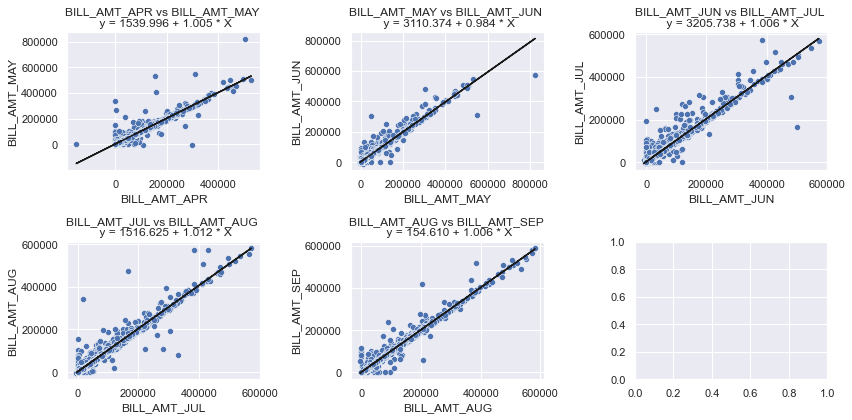

In [104]:
R_square_list = month_Correlation(X = bill_n[0:5], y = bill_n[1:6], data = PAY_SEP_4, month = 1, log_transformation = False, summary = False)

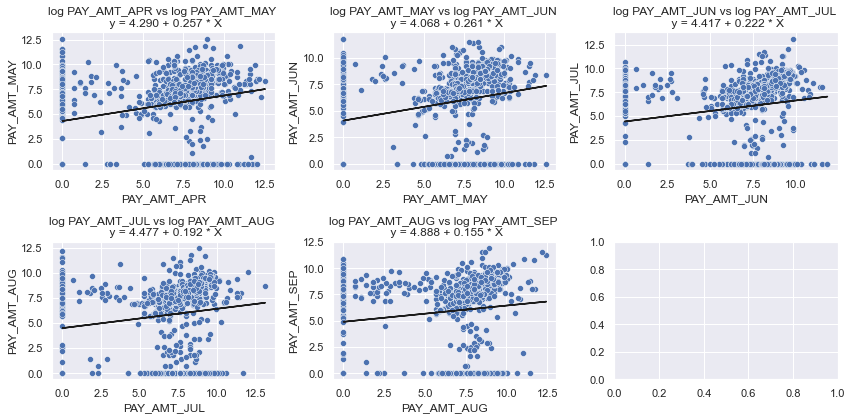

In [105]:
R_square_list = month_Correlation(X = pay_n[0:5], y = pay_n[1:6], data = PAY_SEP_4, month = 1, log_transformation = True, summary = False)

- PAY_SEP값이 -2, -1, 0은 전 달의 BILL_AMT값이 낮을 수록 현재의 BILL_AMT값의 분산이 더 크다.
- 나머지 PAY_SEP값은 전체적으로 분산이 동일하다.

In [30]:
train.loc[: ,"bin"] = pd.cut(AGE_train['AGE'], bins=7)

In [50]:
for i in range(train.shape[0]):
    age = train.loc[i, "AGE"]
    if age >= 20 and age < 30:
        train.loc[i, "BINS"] = 0   ##[20,30)
    elif age < 40:
        train.loc[i, "BINS"] = 1    ##[30, 40)
    elif age < 50: 
        train.loc[i, "BINS"] = 2   ##[40, 50)
    elif age <60 :
        train.loc[i, "BINS"] = 3   ##[50, 60)
    elif age< 70:
        train.loc[i, "BINS"] = 4   ##[60, 70)
    else:
        train.loc[i, "BINS"] = 5   ##[70, 80)

In [117]:
train = train.drop(["PAY_SEP_0","PAY_SEP_1","PAY_SEP_2","PAY_SEP_3"], axis = 1)

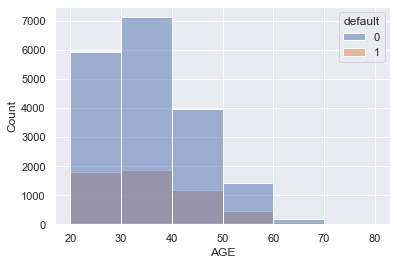

In [53]:
AGE_train = train[["AGE", "default","BINS"]]

sns.histplot(x = "AGE", data = AGE_train, hue = "default", bins = [20, 30, 40, 50, 60, 70, 80])
plt.show()

In [57]:
age_default_ratio = ratio_df(AGE_train, "BINS", "default")
age_default_ratio.index = age_default_ratio.index.astype(np.int)
age_default_ratio

,default
BINS,
0,0.231187
1,0.207583
2,0.227512
3,0.241858
4,0.298805
5,0.368421


In [106]:
def ratio_df(df, group, target):
    return df.groupby(group).agg({target: "sum"}) / df.groupby(group).agg({target: "count"})

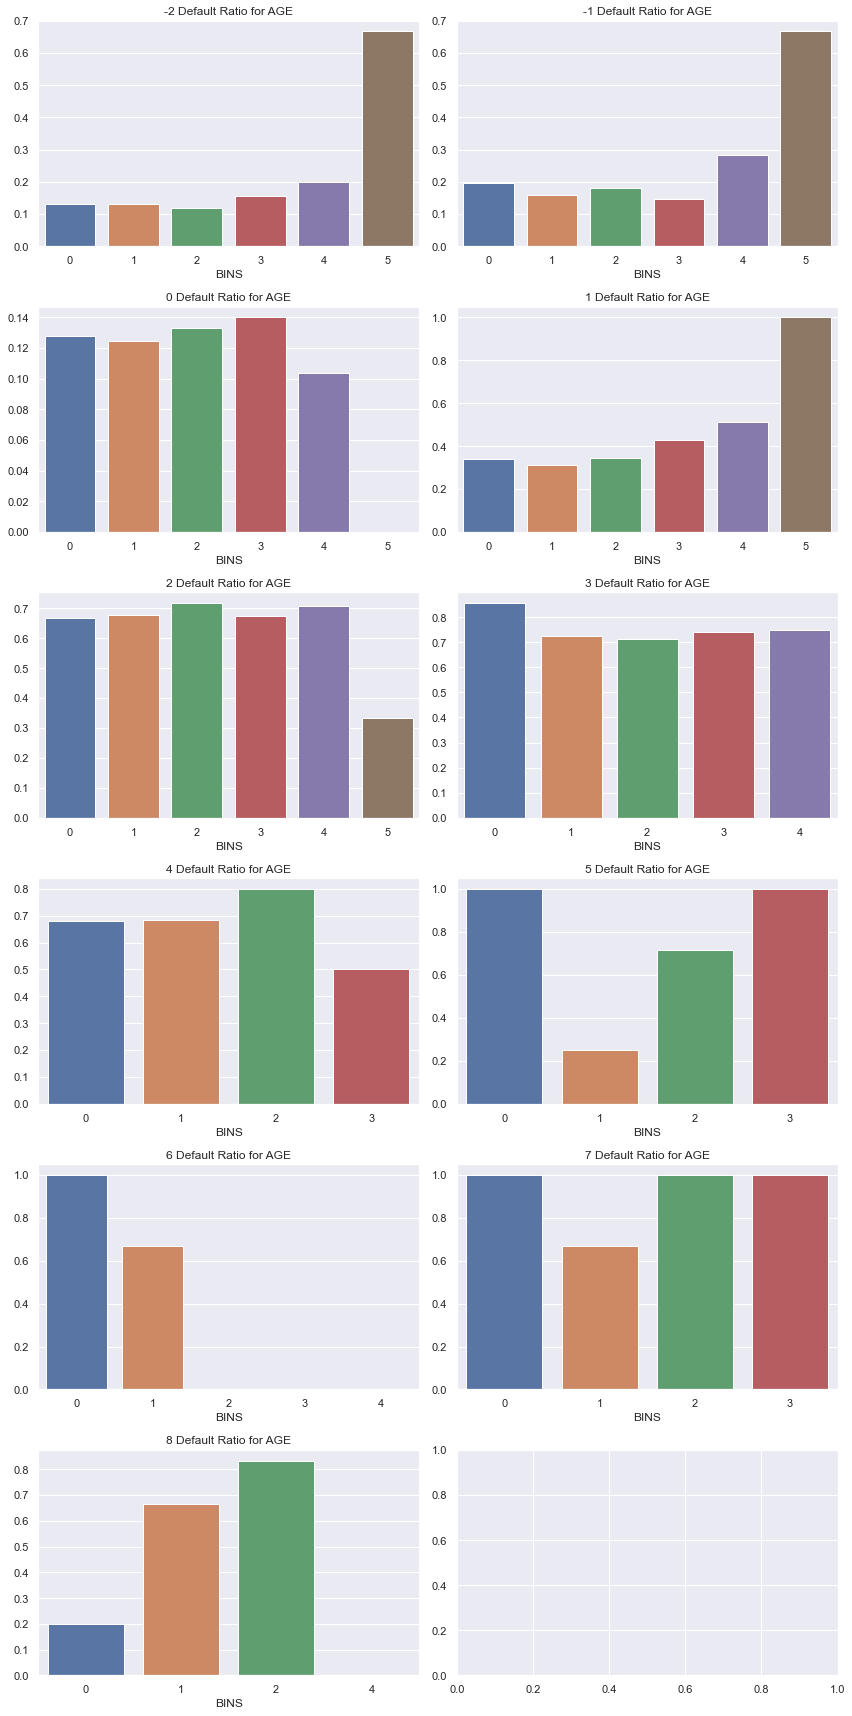

In [120]:
fig, ax = plt.subplots(6, 2, figsize = (12, 24))
ax = ax.flatten()

for (i, pay) in enumerate(np.sort(train["PAY_SEP"].unique())):
    age_default_ratio = ratio_df(AGE_PAY_SEP_train[AGE_PAY_SEP_train["PAY_SEP"] == pay], "BINS", "default")
    age_default_ratio.index = age_default_ratio.index.astype(np.int)
    
    sns.barplot(x = age_default_ratio["default"].index, y = age_default_ratio["default"].to_numpy(), ax = ax[i])
    ax[i].set_title("{} Default Ratio for AGE".format(pay))
    
plt.tight_layout()
plt.show()

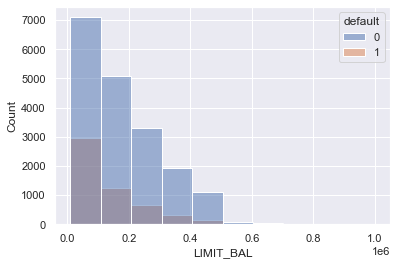

In [124]:
sns.histplot(x = "LIMIT_BAL", data = train, hue = "default", bins = 10)
plt.show()

In [125]:
np.histogram_bin_edges(train["LIMIT_BAL"], bins = 10)

array([  10000.,  109000.,  208000.,  307000.,  406000.,  505000.,
        604000.,  703000.,  802000.,  901000., 1000000.])

In [135]:
for i in range(train.shape[0]):
    lb = train.loc[i, "LIMIT_BAL"]
    if lb >= 10000 and lb < 109000:
        train.loc[i, "BINS"] = 0   ##[10000,109000)
    elif lb < 208000:
        train.loc[i, "BINS"] = 1    ##[109000, 208000)
    elif lb < 307000: 
        train.loc[i, "BINS"] = 2   ##[208000, 307000)
    elif lb <406000 :
        train.loc[i, "BINS"] = 3   ##[307000, 406000)
    elif lb< 505000:
        train.loc[i, "BINS"] = 4   ##[406000, 505000)
    elif lb <604000:
        train.loc[i, "BINS"] = 5   ##[505000, 604000)
    elif lb <703000:
        train.loc[i, "BINS"] = 6   ##[604000, 703000)
    elif lb <802000:
        train.loc[i, "BINS"] = 7   ##[703000, 802000)
    elif lb < 901000:
        train.loc[i, "BINS"] = 8   ##[802000, 901000)
    else:
        train.loc[i, "BINS"] = 9  ##[901000, 1000000)

In [137]:
ratio_df(train, "BINS", "default")

,default
BINS,
0.0,0.293720
1.0,0.195749
2.0,0.168841
3.0,0.142537
4.0,0.126291
5.0,0.141509
6.0,0.069767
7.0,0.157895
9.0,0.000000


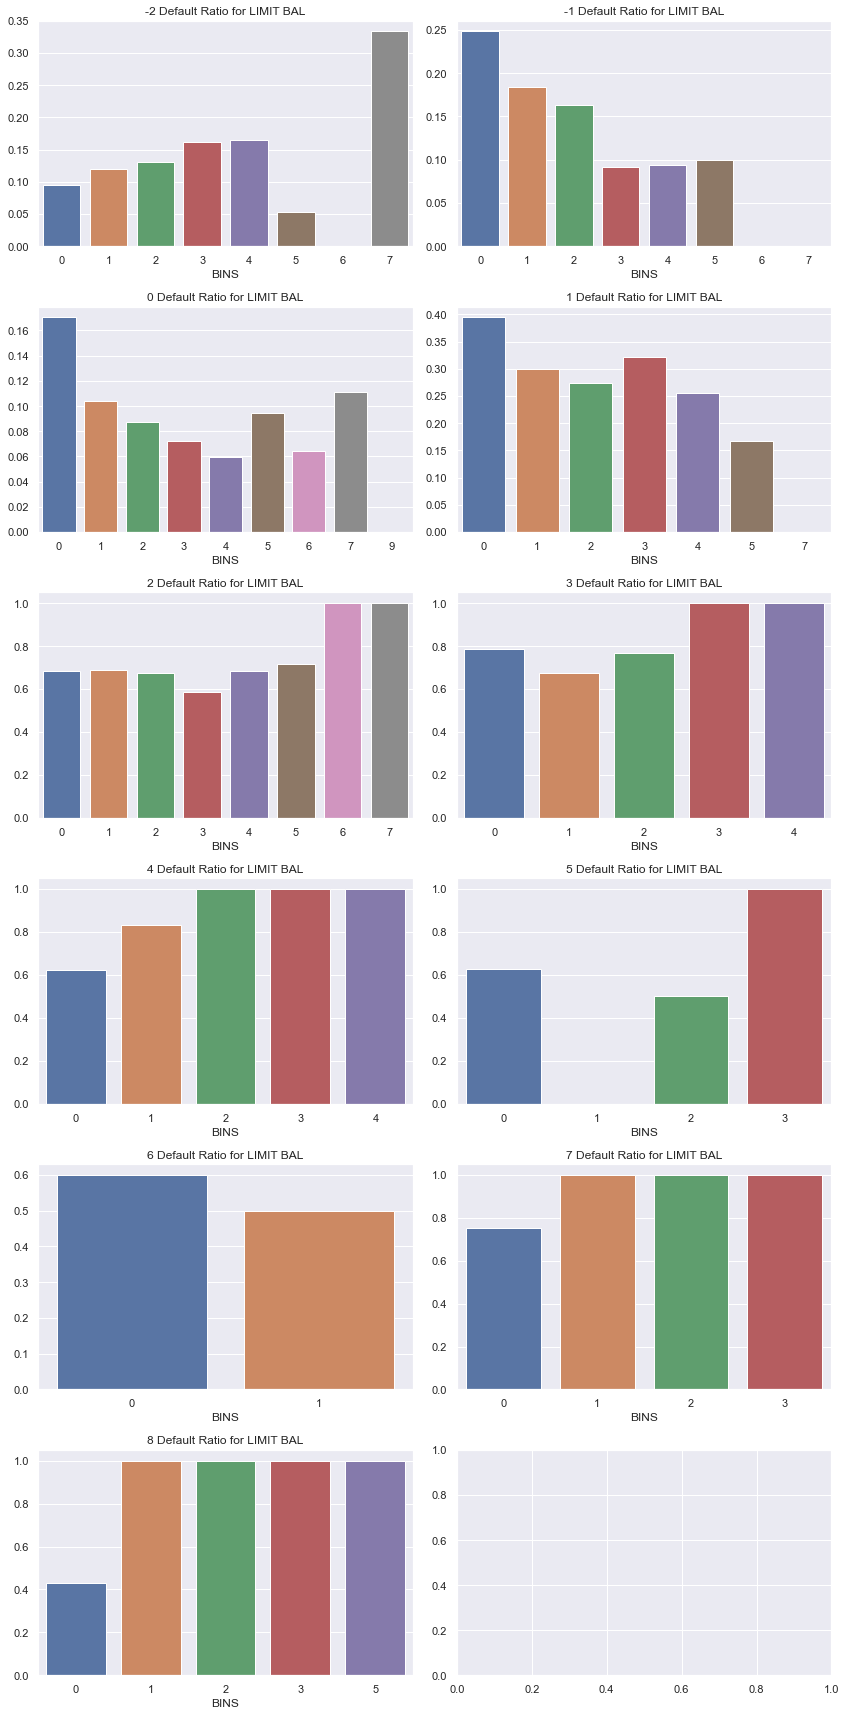

In [136]:
fig, ax = plt.subplots(6, 2, figsize = (12, 24))
ax = ax.flatten()

for (i, pay) in enumerate(np.sort(train["PAY_SEP"].unique())):
    lb_default_ratio = ratio_df(train[train["PAY_SEP"] == pay], "BINS", "default")
    lb_default_ratio.index = lb_default_ratio.index.astype(np.int)
    
    sns.barplot(x = lb_default_ratio["default"].index, y = lb_default_ratio["default"].to_numpy(), ax = ax[i])
    ax[i].set_title("{} Default Ratio for LIMIT BAL".format(pay))
    
plt.tight_layout()
plt.show()